# Дипломная работа

### Автор: Кузнецов С.И.

# 1.  Business Understanding

## 1.1. Цель

Построить математическую модель, разделяющую хороших и плохих клиентов.

## 1.2. Описание 

Кредитные карты являются распространенным методом контроля рисков в финансовой отрасли. Он использует личную информацию и данные, предоставленные соискателями кредитных карт, для прогнозирования вероятности будущих дефолтов и займов по кредитным картам. Банк вправе решить, выдавать ли заявителю кредитную карту. Кредитный рейтинг может объективно количественно оценить величину риска.
 
Вообще говоря, кредитные карты основаны на исторических данных. Однажды столкнувшись с большими экономическими колебаниями. Прошлые модели могут потерять свою первоначальную предсказательную силу. Логистическая модель - распространенный метод кредитного скоринга. Потому что Logistic подходит для задач бинарной классификации и может вычислять коэффициенты каждой функции. Чтобы облегчить понимание и работу, оценочная карта умножит коэффициент логистической регрессии на определенное значение (например, 100) и округлит его.
 
В настоящее время с развитием алгоритмов машинного обучения. В систему оценки кредитных карт были введены другие методы прогнозирования, такие как Boosting, Random Forest и Support Vector Machines. Однако эти методы часто не обладают хорошей прозрачностью. Может быть трудно объяснить клиентам и регулирующим органам причину отказа или принятия.

# 2. Data Understanding

## 2.1. Import Libraries 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## 2.2. Вспомогательные функции и переменные

In [2]:
# Местонахождение файлов с исходными данными
path = './data/'

# Построение тепловой карты корреляций
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    _ = sns.heatmap(
        corr, 
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
    
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    #facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()
    
def plot_variable_importance( X , y ):
    tree = DecisionTreeRegressor( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

## 2.3. Выгрузка данных 

In [3]:
# Данные о заявках
application_record = pd.read_csv(path + 'application_record.csv')

# Данные о выдачах
credit_record = pd.read_csv(path + 'credit_record.csv')

## 2.4. Статистика и визуализация 

### 2.4.1. Заявки

In [4]:
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


#### 2.4.1.1. Описание переменных 

*ID* - Номер клиента

*CODE_GENDER* - Пол

*FLAG_OWN_CAR* - Имеется ли автомобиль	

*FLAG_OWN_REALTY* - Имеется ли собственность	

*CNT_CHILDREN* - Количество детей	

*AMT_INCOME_TOTAL* - Годовой доход	

*NAME_INCOME_TYPE* - Категория дохода

*NAME_EDUCATION_TYPE* - Уровень образования	

*NAME_FAMILY_STATUS* - Семейное положение	

*NAME_HOUSING_TYPE* - Проживание

*DAYS_BIRTH* -	Возраст, дн.

*DAYS_EMPLOYED* - Если отрицательное число - количество дней с момента приема на работу. Если положительное - безработный

*FLAG_MOBIL* - Наличие мобильного телефона	

*FLAG_WORK_PHONE* - Наличие рабочего телефона	

*FLAG_PHONE* - Наличие телефона

*FLAG_EMAIL* - Наличие email	

*OCCUPATION_TYPE* - Род занятий	

*CNT_FAM_MEMBERS* - Размер семьи

#### 2.4.1.2. Ключевая информация о переменных 

In [5]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
application_record.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


Переменная *FLAG_MOBIL* во всем датасете равна 1 и следовательно, не несет никакой информационной ценности.
Убираем эту переменную из датасета.

In [7]:
application_record.drop('FLAG_MOBIL', axis = 1, inplace = True)

#### 2.4.1.3. Тепловая матрица корреляций 

При построении матрицы корреляций не будем учитывать переменную ID, так как эта переменная только идентифицирует клиента и никак его не характеризует.

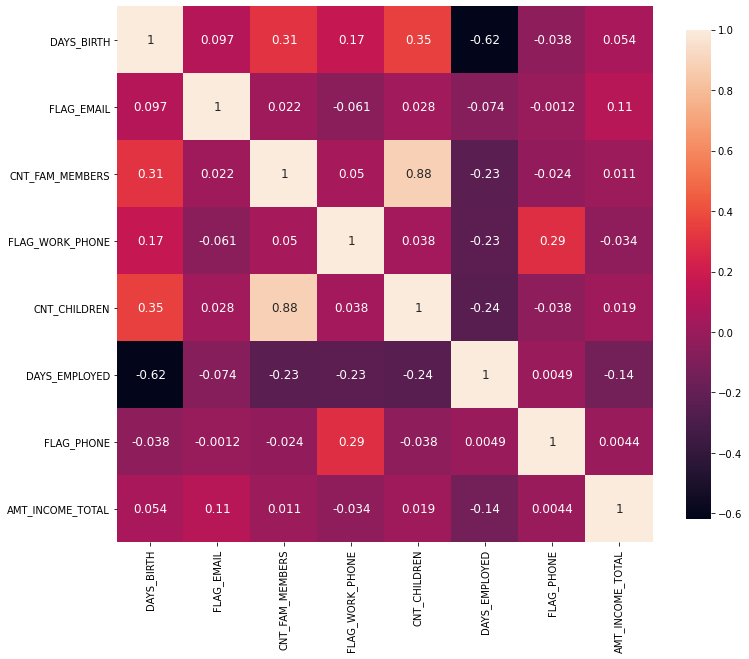

In [8]:
plot_correlation_map(application_record[set(application_record.columns.values) - {'ID'}])

**Зависимости из матрицы корреляций:**
1. Возраст клиента коррелирует с опытом работы на последнем месте. Чем больше возраст, тем меньше опыт работы на последнем месте.
2. Количество детей коррелирует с общим количеством членов семьи. Но коэффициент корреляции не равен 1, значит в выборке есть неполные семьи, либо некорректно заполненные данные.

In [9]:
application_record[application_record.DAYS_EMPLOYED > 0].DAYS_EMPLOYED.unique()

array([365243])

Т.е. если человек безработный, то в переменная *DAYS_EMPLOYED* принимает значение, равное *365243*

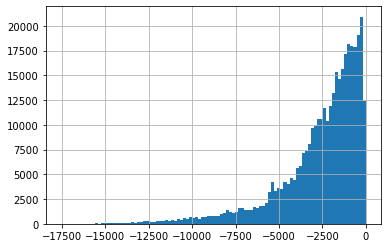

In [10]:
_ = application_record[application_record.DAYS_EMPLOYED <= 0].DAYS_EMPLOYED.hist(bins = 100)

In [11]:
application_record['UNEMPLOYED'] = \
application_record.DAYS_EMPLOYED.apply(lambda x: 1 if x >= 0 else 0)
application_record['UNEMPLOYED'].value_counts()

0    363228
1     75329
Name: UNEMPLOYED, dtype: int64

In [12]:
application_record['CNT_ADULT_FAM_MEMBERS'] = application_record.CNT_FAM_MEMBERS - application_record.CNT_CHILDREN

In [13]:
application_record['CNT_ADULT_FAM_MEMBERS'].value_counts()

 2.0    336551
 1.0    101907
 0.0        58
-1.0        36
-2.0         5
Name: CNT_ADULT_FAM_MEMBERS, dtype: int64

In [14]:
application_record['FAMILY_STATUS'] = \
application_record['CNT_ADULT_FAM_MEMBERS'].apply(lambda x: \
                                                  'NON_CORRECT' if x <= 0 else 'NON_FULL' if x == 1 else 'FULL')

application_record['FAMILY_STATUS'].value_counts()

FULL           336551
NON_FULL       101907
NON_CORRECT        99
Name: FAMILY_STATUS, dtype: int64

В наборе заявок имеются клиенты, подавшие более одной заявки. Добавим параметр, характеризующий количество заявок от одного клиента.

In [15]:
num_of_applications = application_record.ID.value_counts().to_dict()
application_record['NUM_OF_APPLICATIONS'] = application_record.ID.apply(num_of_applications.get)
application_record['NUM_OF_APPLICATIONS'].value_counts()

1    438463
2        94
Name: NUM_OF_APPLICATIONS, dtype: int64

### 2.4.2. Выдачи

In [16]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


#### 2.4.2.1. Описание переменных: 

*ID* - Номер клиента

*MONTHS_BALANCE* - Месяц. Месяц извлеченных данных является отправной точкой, в обратном порядке, 0 - текущий месяц, -1 - предыдущий месяц и т.д.

*STATUS* - Данные о просроченных платежах:
* *0*: 1-29 дней с просрочкой 
* *1*: 30-59 дней с просрочкой 
* *2*: 60-89 дней с просрочкой 
* *3*: 90-119 дней с просрочкой 
* *4*: 120-149 дней с просрочкой 
* *5*: просроченной или безнадежной задолженностью, списание более чем 150 дней 
* *C*: выплачено в этом месяце 
* *X*: Нет ссуды за месяц

In [17]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


#### 2.4.2.2. Количество клиентов в выборке 

In [18]:
credit_record.ID.unique().shape

(45985,)

In [19]:
credit_record.groupby('STATUS')[['MONTHS_BALANCE']].count()

,MONTHS_BALANCE
STATUS,
0,383120
1,11090
2,868
3,320
4,223
5,1693
C,442031
X,209230


#### 2.4.2.3. Целевая фича 

В зависимости от поставленной задачи можно в качестве целевой переменной выбрать:
* Наличие хотя бы одной просрочки за всю историю
* Наличие хотя бы одной просрочки в течение определенного срока с момента получения кредитной карты
* ....

В качестве целевой фичи мы выберем наличие хотя бы одной просрочки в течение года с момента получения карты

In [20]:
#Выберем только тех клиентов у которых карта более полугода
customers_life_time = credit_record.groupby('ID')['MONTHS_BALANCE'].min().to_dict()
credit_record['LIFE_TIME'] = credit_record.ID.apply(customers_life_time.get)
credit_record['HALF_YEAR'] = credit_record['LIFE_TIME'] + 6
credit_record = credit_record[credit_record.LIFE_TIME <= -6]
credit_record = credit_record[(credit_record.MONTHS_BALANCE >= credit_record.LIFE_TIME) &
                             (credit_record.MONTHS_BALANCE <= credit_record.HALF_YEAR)]

In [21]:
good_customers = dict()
for customer in credit_record.groupby('ID'):
    good_customers[customer[0]] = 1
    if '1' in set(customer[1]['STATUS']):
        good_customers[customer[0]] = 0
    if '2' in set(customer[1]['STATUS']):
        good_customers[customer[0]] = 0
    if '3' in set(customer[1]['STATUS']):
        good_customers[customer[0]] = 0
    if '4' in set(customer[1]['STATUS']):
        good_customers[customer[0]] = 0
    if '5' in set(customer[1]['STATUS']):
        good_customers[customer[0]] = 0

In [22]:
application_record['GOOD_CUSTOMER'] = application_record.ID.apply(good_customers.get)
application_record = application_record[~np.isnan(application_record.GOOD_CUSTOMER)]
application_record.shape

(32567, 22)

In [23]:
application_record.GOOD_CUSTOMER.value_counts()

1.0    30152
0.0     2415
Name: GOOD_CUSTOMER, dtype: int64

### 2.4.3. Датасет с целевой фичей 

In [24]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32567 entries, 0 to 434812
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     32567 non-null  int64  
 1   CODE_GENDER            32567 non-null  object 
 2   FLAG_OWN_CAR           32567 non-null  object 
 3   FLAG_OWN_REALTY        32567 non-null  object 
 4   CNT_CHILDREN           32567 non-null  int64  
 5   AMT_INCOME_TOTAL       32567 non-null  float64
 6   NAME_INCOME_TYPE       32567 non-null  object 
 7   NAME_EDUCATION_TYPE    32567 non-null  object 
 8   NAME_FAMILY_STATUS     32567 non-null  object 
 9   NAME_HOUSING_TYPE      32567 non-null  object 
 10  DAYS_BIRTH             32567 non-null  int64  
 11  DAYS_EMPLOYED          32567 non-null  int64  
 12  FLAG_WORK_PHONE        32567 non-null  int64  
 13  FLAG_PHONE             32567 non-null  int64  
 14  FLAG_EMAIL             32567 non-null  int64  
 15  O

In [25]:
application_record.NUM_OF_APPLICATIONS.value_counts()

1    32567
Name: NUM_OF_APPLICATIONS, dtype: int64

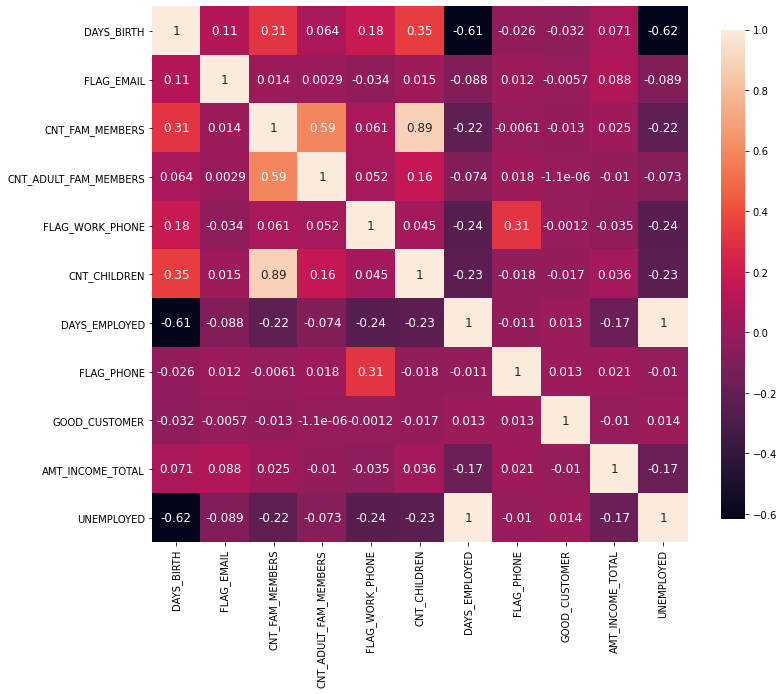

In [26]:
plot_correlation_map(application_record[set(application_record.columns.values) - {'ID', 'NUM_OF_APPLICATIONS'}])

/opt/anaconda3/envs/DS_diploma_work/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/DS_diploma_work/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


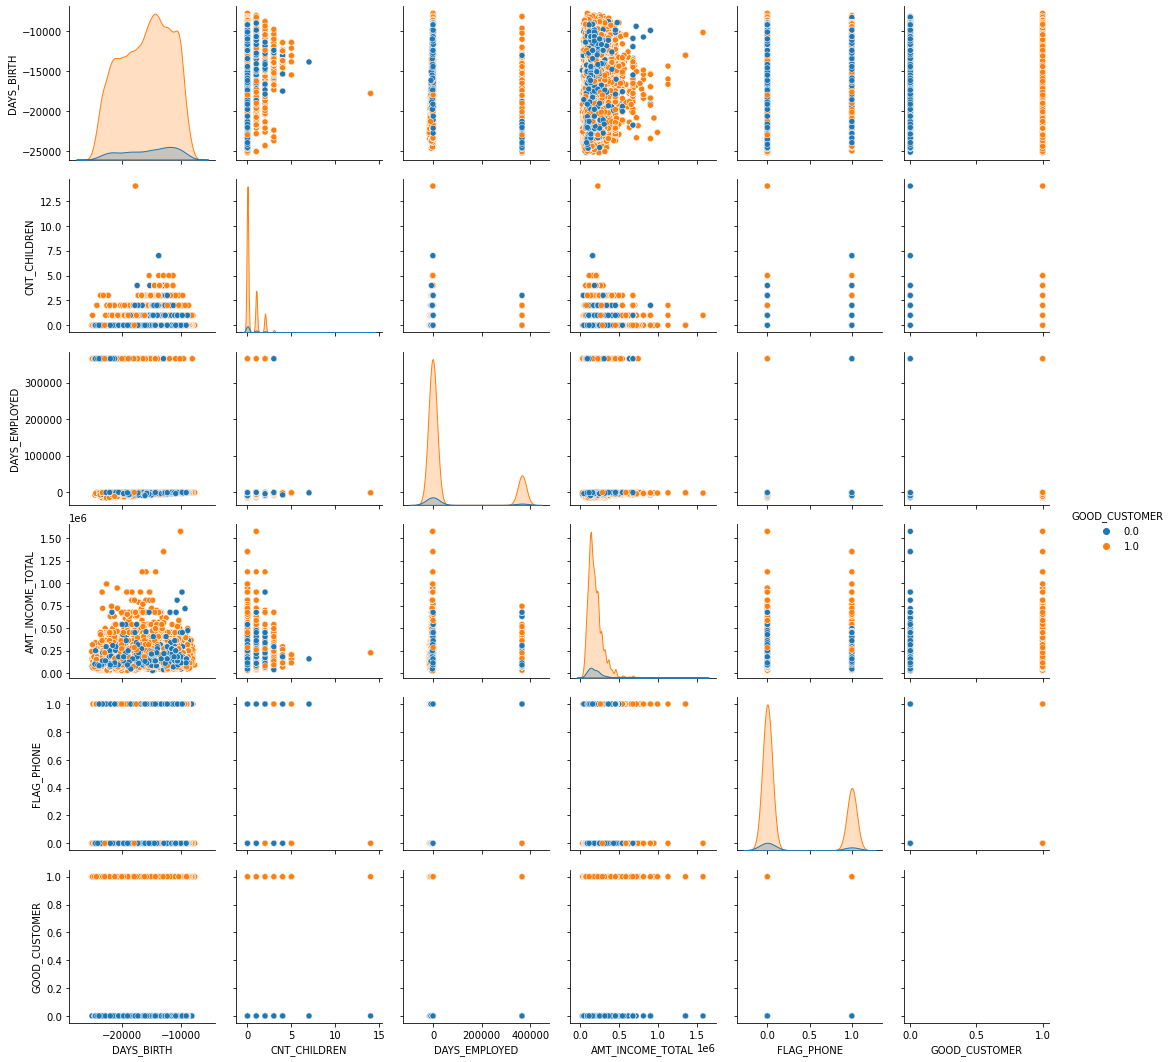

In [27]:
sns.pairplot(data = application_record, 
             vars = ['DAYS_BIRTH', 'CNT_CHILDREN', 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL', 'FLAG_PHONE' , 'GOOD_CUSTOMER'],
             hue = 'GOOD_CUSTOMER',
            )

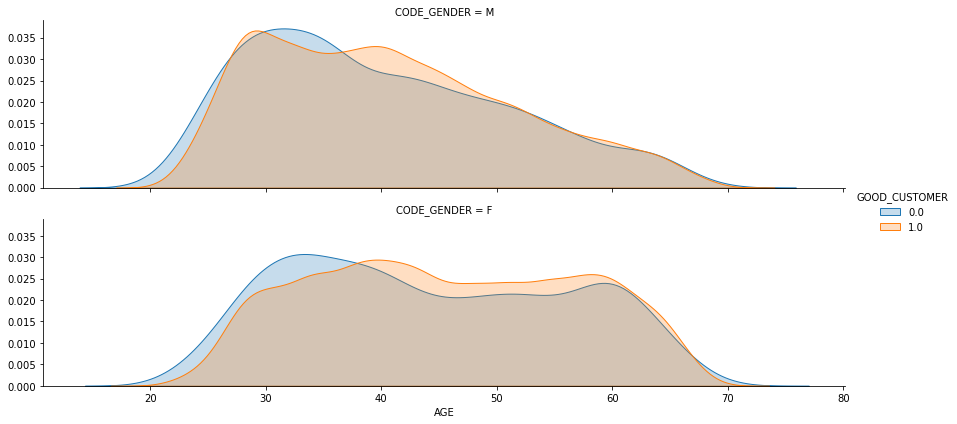

In [28]:
application_record['AGE'] = - application_record.DAYS_BIRTH / 365
plot_distribution(application_record, var = 'AGE', row = 'CODE_GENDER', target = 'GOOD_CUSTOMER')

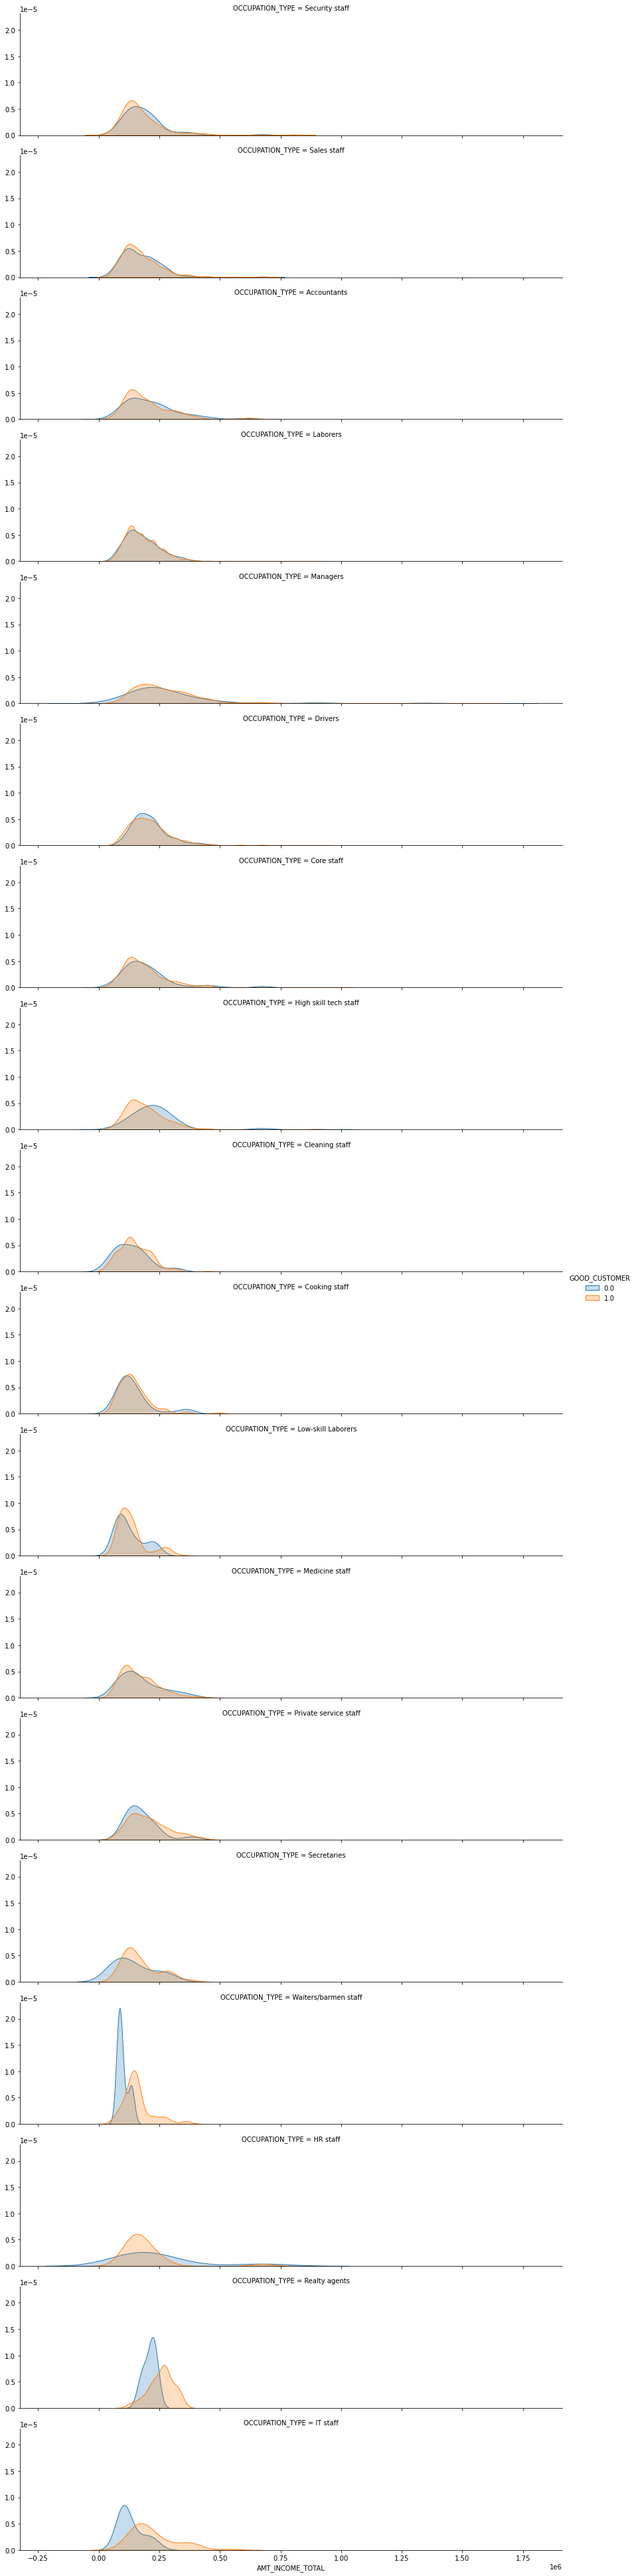

In [29]:
plot_distribution(application_record, var = 'AMT_INCOME_TOTAL', row = 'OCCUPATION_TYPE', target = 'GOOD_CUSTOMER')

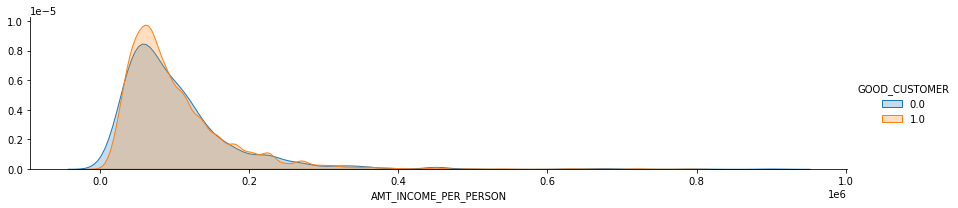

In [30]:
application_record['AMT_INCOME_PER_PERSON'] = application_record['AMT_INCOME_TOTAL'] / application_record['CNT_FAM_MEMBERS']
plot_distribution(application_record, var = 'AMT_INCOME_PER_PERSON', target = 'GOOD_CUSTOMER')

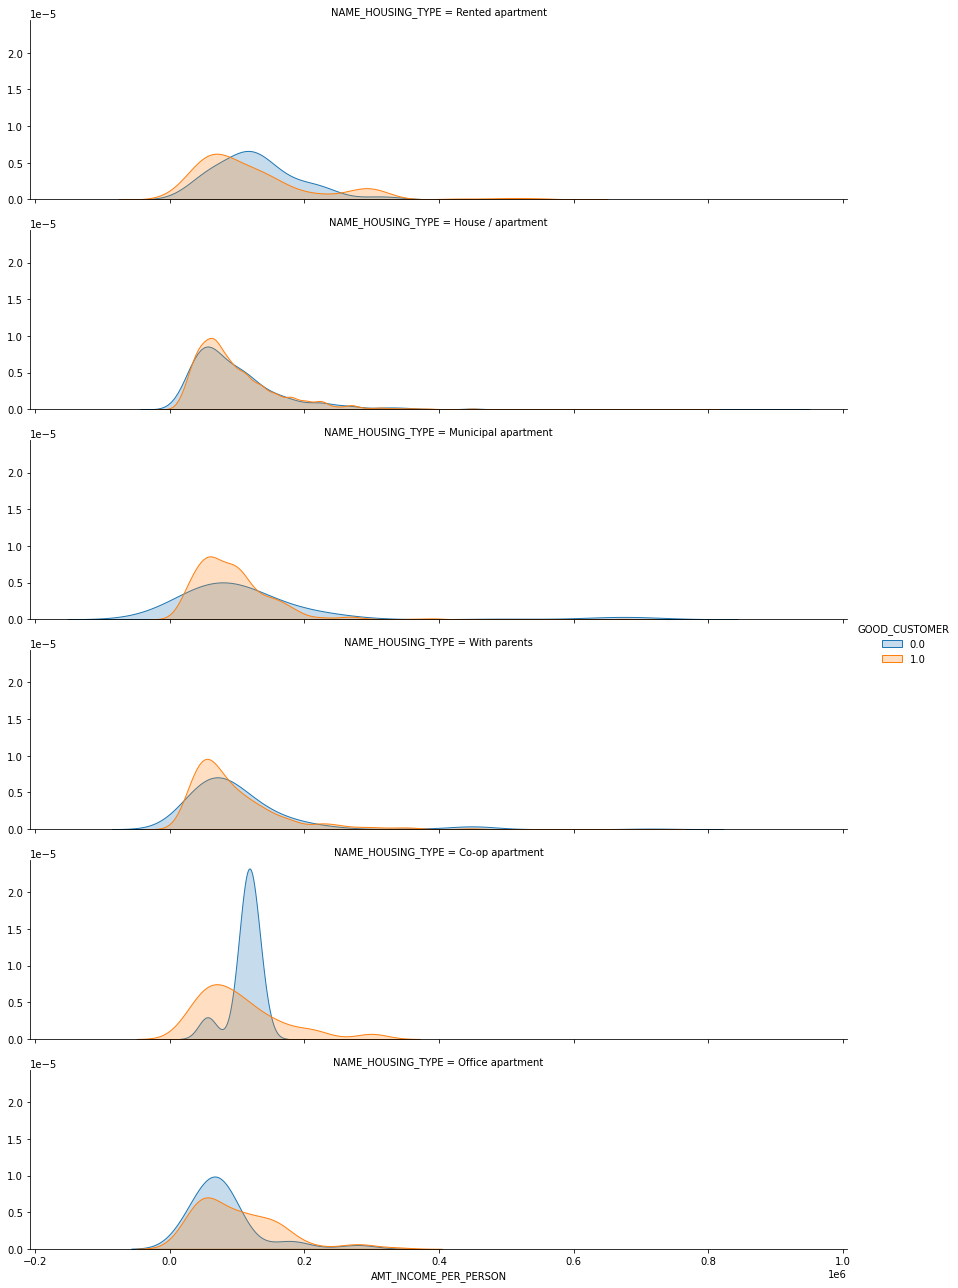

In [31]:
plot_distribution(application_record, var = 'AMT_INCOME_PER_PERSON', row = 'NAME_HOUSING_TYPE', target = 'GOOD_CUSTOMER')

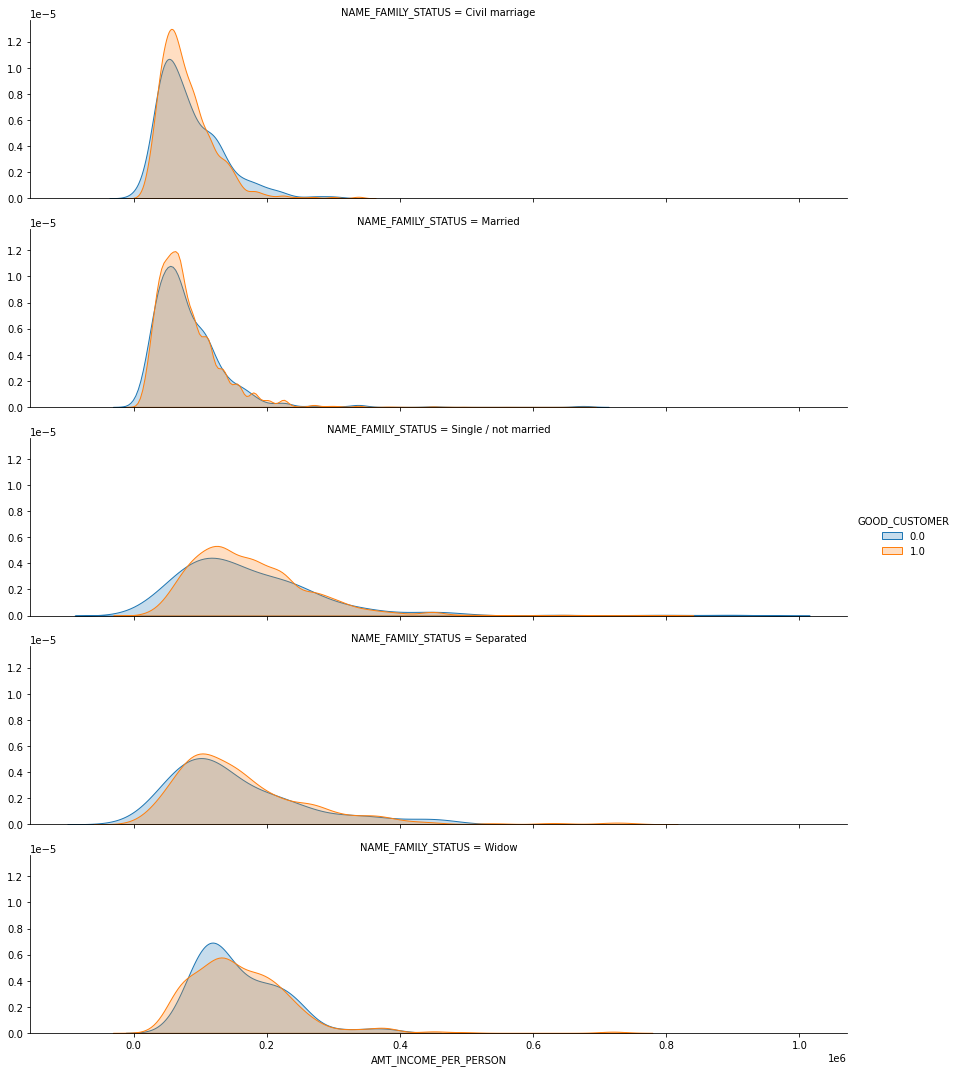

In [32]:
plot_distribution(application_record, var = 'AMT_INCOME_PER_PERSON', row = 'NAME_FAMILY_STATUS', target = 'GOOD_CUSTOMER')

/opt/anaconda3/envs/DS_diploma_work/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


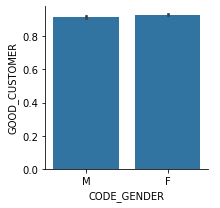

In [33]:
plot_categories(application_record, cat = 'CODE_GENDER', target = 'GOOD_CUSTOMER')

/opt/anaconda3/envs/DS_diploma_work/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


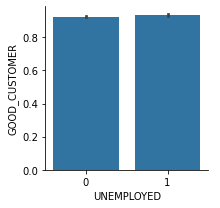

In [34]:
plot_categories(application_record, cat = 'UNEMPLOYED', target = 'GOOD_CUSTOMER')

/opt/anaconda3/envs/DS_diploma_work/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


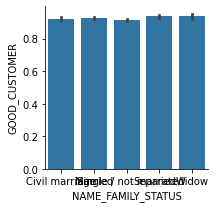

In [35]:
plot_categories(application_record, cat = 'NAME_FAMILY_STATUS', target = 'GOOD_CUSTOMER')

/opt/anaconda3/envs/DS_diploma_work/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


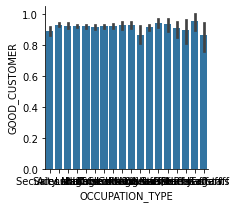

In [36]:
plot_categories(application_record, cat = 'OCCUPATION_TYPE', target = 'GOOD_CUSTOMER')

# 3. Data Preparation

# 4. Modelling

# 5. Evaluation

# 6. Deployment

In [29]:
app_count = application_record.groupby('ID').ID.count()
app_count[app_count > 1].head()

ID
7022197    2
7022327    2
7023108    2
7023651    2
7024111    2
Name: ID, dtype: int64

In [32]:
application_record[application_record.ID == 7022197].iloc[0]

ID                                  7022197
CODE_GENDER                               F
FLAG_OWN_CAR                              N
FLAG_OWN_REALTY                           Y
CNT_CHILDREN                              0
AMT_INCOME_TOTAL                   450000.0
NAME_INCOME_TYPE       Commercial associate
NAME_EDUCATION_TYPE        Higher education
NAME_FAMILY_STATUS                Separated
NAME_HOUSING_TYPE         House / apartment
DAYS_BIRTH                           -19813
DAYS_EMPLOYED                         -1799
FLAG_MOBIL                                1
FLAG_WORK_PHONE                           0
FLAG_PHONE                                0
FLAG_EMAIL                                1
OCCUPATION_TYPE                         NaN
CNT_FAM_MEMBERS                         1.0
Name: 425023, dtype: object

In [33]:
application_record[application_record.ID == 7022197].iloc[1]

ID                                           7022197
CODE_GENDER                                        M
FLAG_OWN_CAR                                       Y
FLAG_OWN_REALTY                                    Y
CNT_CHILDREN                                       3
AMT_INCOME_TOTAL                            135000.0
NAME_INCOME_TYPE                             Working
NAME_EDUCATION_TYPE    Secondary / secondary special
NAME_FAMILY_STATUS                           Married
NAME_HOUSING_TYPE                  House / apartment
DAYS_BIRTH                                    -11945
DAYS_EMPLOYED                                   -735
FLAG_MOBIL                                         1
FLAG_WORK_PHONE                                    0
FLAG_PHONE                                         0
FLAG_EMAIL                                         1
OCCUPATION_TYPE                             Laborers
CNT_FAM_MEMBERS                                  5.0
Name: 426818, dtype: object